# Ensemble Techniques

We regularly come across many game shows on television and you must have noticed an option of "Audience Poll" Most of the times a contestant goes with the option which has the highest vote from the audience and most of the times they win. We can generalize this in real life as well where taking opinions from a majority of people is much more preferred than the opinion of a single person. Ensemble technique has a similar undortying idea where we aggregate predictions from a group of predictors, which may be classifiers or regressors, and most of the times the prediction is better than the one obtained using a single predictor. Such algorithms are called Ensemble methods and such predictors are called Ensembles.

Let's suppose we have 'n predictors

Z1, Z2, Z3 Zn with a standard deviation of a

Var(z) = 0^2

If we use single predictors 21, 22, 23, Zn the variance associated with each will be d2 but the expected value will be the average of all the predictors

Lets consider the average of the predictors:

με (21+22+23+ + Znjin

if we use u as the predictor then the expected value still remains the same but see the variance now.

vanance(p) = 0^2/n

So the expected value remained y' but variance decreases when we use average of all the predictors.

This is why taking mean is preferred over using single predictors.

Ensemble methods take multiple small models and combine their predictions to obtain a more powerful predictive power,

There are few very popular Ensemble techniques which we will talk about in detail such Bagging, Boosting, stacking etc

# BAGGING (BOOTSTRAP AGGREGATION)

In real life scenarios we don't have multiple different training sets on which we can train our model separately and at the end combine their result. Hore, bootstrapping comes into picture. Bootstrapping is a technique of sampling different sets of data from a given training set by using replacement After bootstrapping the training dataset, we train model on all the different sets and aggregate the result. This technique is known as Bootstrap Aggregation or Bagging

Let's see definition of bagging.

Bagging is the type of ensemble technique in which a single training algorithm is used on different subsets of the training data where the subset sampling is dono with replacement (bootstrap). Once the algonthm a trained on all the subsets, then bagging makes the prediction by aggregating all the predictions made by the algorithm on different subsets. In case of regression, bagging prediction is simply the mean of all the predictions and in the case of classifier, bagging prediction is the most frequent prediction (majonty vote, among all the predictions.

Bagging is also known as parallel model since we run all models paratlery and combine there results at the end

# Advantages of a Bagging Model

Bagging significantly decreases the variance without increasing bias.

2 Bagging methods work so well because of diversity in the training data since the sampling is done by bootstraping

3 Also, if the training set is very huge, it can save computional time by training nodel on relatively smaller data se

tand still can increase the accuracy of the model

4 Works well with small datasets as well

# "Disadvantage of a Bagging Model


The main disadvantage of Bagging is that it improves the accuracy of the model on the expense of interpretability ie. if a single tree was being used as the base model, then it would have a more attarctive and easily interpretable diagram, but with use of bagging this interpretability gets lost

# Pasting

Pasting is an insemble technique similar to bagging with the only difference being that there is no replacement done while sampling the training dataset. This cauges lesa diversity in the sampled datasets and data ends up being correlated. That's why bagging is more preffered than pasting in real scenanos

# Out-of-Bag Evaluation

in bagging, when different samples are collected, no sample contains all the data but a fraction of the onginal dataset. There might be some data which are never sampled at all. The remaining data which are not sampled are called out of bag instances Since the model never trains over these data, they can be used for evaluating the accuracy of the model by using these data for predicition. We not need validation set or cross validation and can use out of bag instances for that purpose

Let's see python implementation of Bagging

# Bagging Classifier

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()
X=dataset.data
y=dataset.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4)

In [4]:
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.8951048951048951

lets use bagging over KNN classifier and see if our score improves:


In [5]:
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                         n_estimators=9,max_samples=0.7,
                         bootstrap=True,random_state=3,oob_score=True)

In [6]:
bag_knn.fit(X_train,y_train)
bag_knn.score(X_test,y_test)

0.9020979020979021

great our score significantly improves with use of bagging

lets not use bootstrap and see the model accuracy! remember this is 'pasting'

In [7]:
pasting_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             n_estimators=99,max_samples=0.7,
                             bootstrap=False,random_state=3)

In [8]:
pasting_knn.fit(X_train,y_train)
pasting_knn.score(X_test,y_test)

0.8951048951048951

# Random Forests

Decision bees are one of such modets which have low bias but high variance. We have studied that decision trees tend to overfit the data. So bagging Nechnique becomes a very good solution for decreasing the variance in a decision tree. Instead of using a bagging model with underlying model as a decision Res we can also use Random forest which is more convenient and well optimized for decision trees. The main issue with bagging is that there is not much independence among the sampled datasets ie thore is correlation. The advantage of random forests over bagging models is that the random forests makes a weak in the working algonthm of bagging model to decrease the correlation in trees. The idea is to introduce more randomness while creating trees which will help in reducing correlation

Let's understand how algorithm works for a random forest model:

Just like in bagging, different samples are collected from the training dataset using bootstraping.

2 On each sample we train our tree model and we allow the trees to grow with high depths.

Now the difference with in random forest is how the trees are formed. In bootstraping we allow all the sample data to be used for splitting the nodes but not with random forests. When building a decision tree, each time a split is to happen, a random sample of 'm' predictors are chosen from the total 'p' pradictors. Only those 'm predictors are allowed to be used for the split.

Why is that?

Suppose in those p predictors, 1 predictor is very strong. Now each sample this predictor will remain the strongest. So, whenever trees will be built these sampied data, this predictor will be chosen by all the trees for splitting and thus will result in similar kind of tree formation for each bootstrap model This introduces correaltion in the dataset and averaging correalted dataset results do not lead low variance. That's why in random forest the choice for selecting node for split is limited and it introduces randomness in the formation of the trees as well. Most of the predictors are not allowed to be considered for split Generally, value of 'm' is taken as mvp, where 'p' is the number of predictors in the sample.

When map the random forest model becomes bagging model.

This method is also referred as "Feature Sampling

3 Once the trees are formed, prediction is made by the random forest by aggregating the predictions of all the model. For regression model, the mean of all the predictions is the fimal prediction and for classification mode, the mode of all the predictions is considered the final predictions.

# Problem Statement

To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

In [9]:
# important libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing normalizing
from sklearn.preprocessing import StandardScaler

# models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
# dataset stats
print(df.shape)

(69301, 13)


In [12]:
# drop id and remove duplicates
df.drop('id',axis=1,inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
# all are int and float types understand the stats of datframe
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# observation
#1 -no missing values
#2-assuming age is in number of days
#3-outliers in height
#4-outliers in systolic blood pressure -ap_high
#5 -outliers in ap_lo
#6 seems cholestrol and glucose are binary.will see in the further analysis

# how to remove duplicates


In [15]:
# duplicate removeal
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(69277, 12)

In [17]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

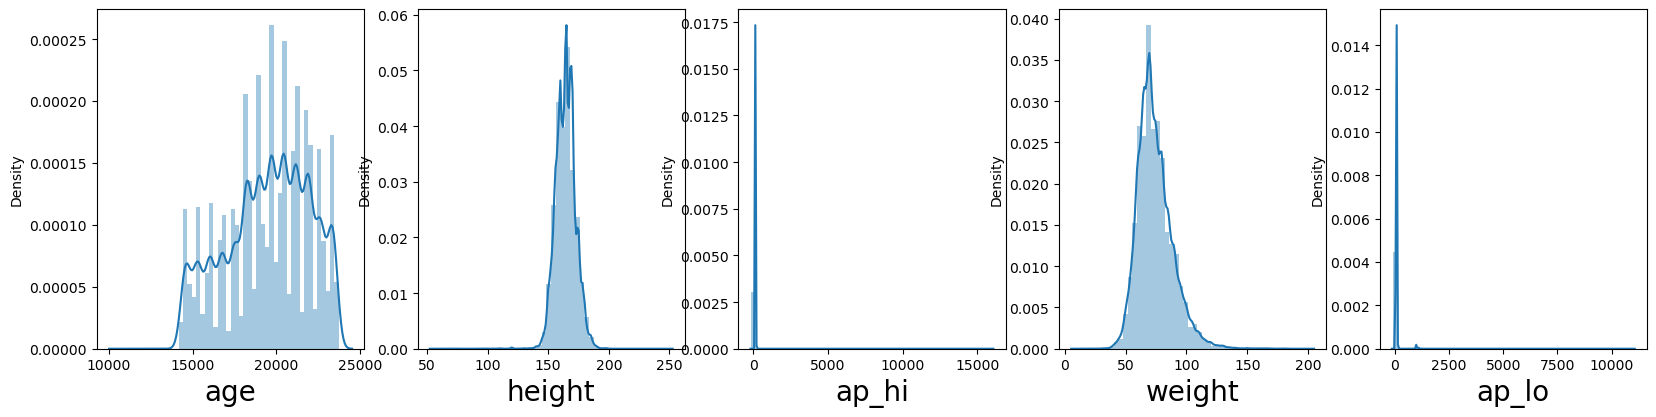

In [18]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=13:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# how it works

# Z distribution statistics

lets transform our normal distribution into Z distribution(standard normal distribution) where mean =0 and std=1

z=(x-mean)/std

In [22]:
# with std 3 lets see the stats
# from scipy import stasts
# Zscore=(x-mean)/std => you  have seen this in standard scaler

## z=(x-mean)/std
from scipy.stats import zscore

z_score=zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score=np.abs(z_score) # apply the formula and get the scaled data

filtering_entry=(abs_z_score<1).all(axis=1)
df=df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000,12822.000000
mean,19748.708080,1.312432,164.968414,71.325394,124.468024,82.153252,1.313290,1.211823,0.071518,0.043363,0.800031,0.458431
std,1295.324388,0.463503,3.777385,6.002975,8.235802,4.154979,0.652255,0.569805,0.257698,0.203681,0.399992,0.498288
min,17215.000000,1.000000,158.000000,62.000000,109.000000,72.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18782.000000,1.000000,162.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19753.000000,1.000000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,20906.750000,2.000000,168.000000,76.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,21944.000000,2.000000,171.000000,84.000000,143.000000,90.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
11,20442,2,169,82.0,130,90,1,1,0,0,1,1
18,20006,2,167,65.0,120,80,1,1,0,0,0,0
26,17569,1,162,80.0,120,80,1,1,0,0,1,0
31,21126,1,164,77.0,110,80,1,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69284,19652,1,165,72.0,120,80,1,1,0,0,1,0
69285,17926,2,168,80.0,120,80,1,1,0,0,1,1
69292,20609,1,159,72.0,130,90,2,2,0,0,1,0
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0


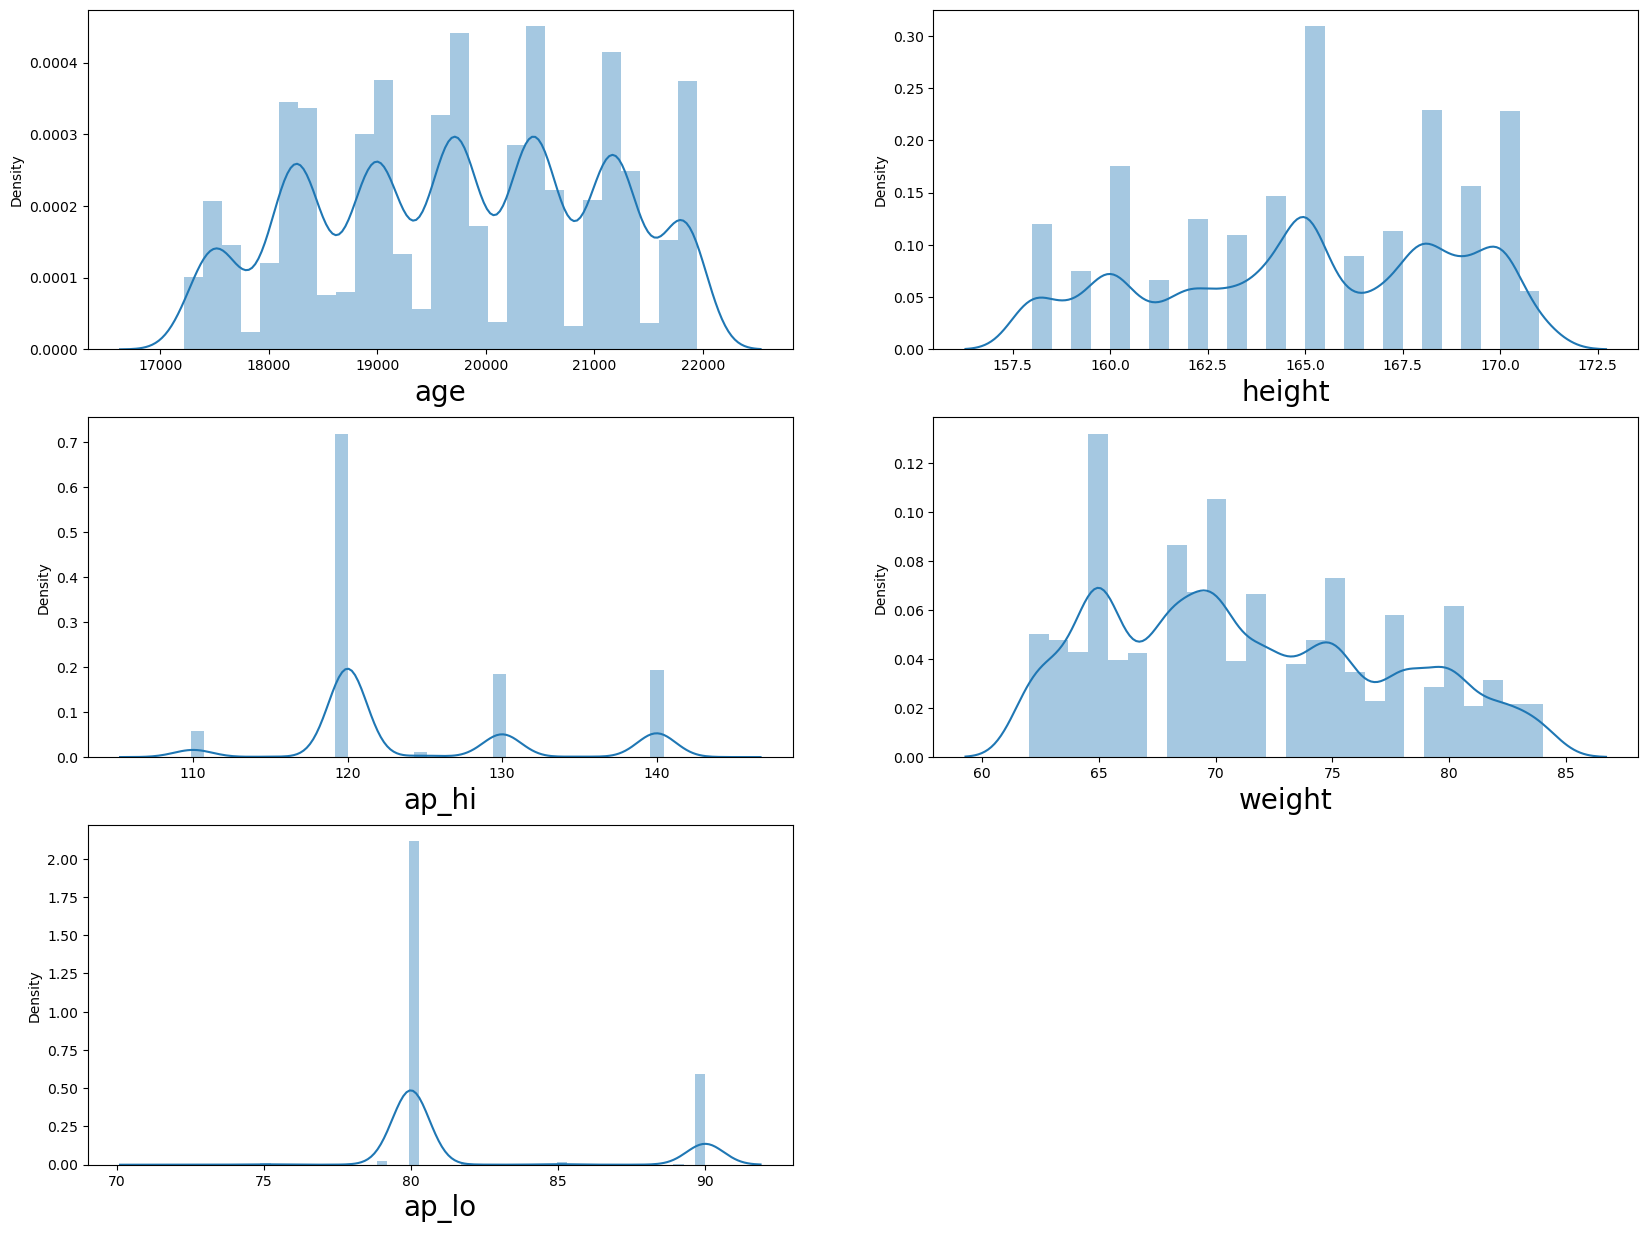

In [25]:
# check the scewness is removed or not
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=13:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [27]:
df.shape

(12822, 12)

1. You can use correlation matrix and plot heatmap to check for multicollinearity or correlation between all variables (Refer decision tree algo for heat map)

OR

2. You can use VIF to check if there is any multicollinearity (refer Logistic Regression for VIF)

In [28]:
# Cannot make out much from the above plots lets build model

X=df.drop(columns=['cardio'],axis=1)
y=df['cardio']


# split into train test data set

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=41)

# Model confidence /accuracy

In [33]:
# write one function and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n==================train result=============')
        print(f'accuracy_score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('\n=============test result=================')
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n test classification report\n ',classification_report(y_test,pred,digits=3)) #model confidence /accuracy


In [34]:
# initiate RandomForestClassifier and train
random_clf=RandomForestClassifier()

# train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
# call the function and pass dataset to check train and test score

metric_score(random_clf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(random_clf,x_train,x_test,y_train,y_test,train=False) # this is for testing score


==================train result=============
accuracy_score:99.93%

=============test result=================
accuracy_score:64.21%

 test classification report
                precision    recall  f1-score   support

           0      0.654     0.712     0.682      2071
           1      0.625     0.561     0.591      1776

    accuracy                          0.642      3847
   macro avg      0.640     0.636     0.636      3847
weighted avg      0.641     0.642     0.640      3847



# lets tune the parameters using GridsearchCV


In [36]:
# RandomForsetclassifer
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]
       }
grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=>',grd.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [37]:
random_clf=grd.best_estimator_ # reinstantiating with best params
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=15)

In [38]:
# call the function and pass dataset to check train and test score
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True) # thus is for training score

metric_score(random_clf,x_train,x_test,y_train,y_test,train=False) # this is for testing score


==================train result=============
accuracy_score:71.96%

=============test result=================
accuracy_score:67.64%

 test classification report
                precision    recall  f1-score   support

           0      0.657     0.836     0.736      2071
           1      0.719     0.490     0.583      1776

    accuracy                          0.676      3847
   macro avg      0.688     0.663     0.659      3847
weighted avg      0.686     0.676     0.665      3847



# note

you  can improve the performance by tweaking preprocessing methods

# lets plot ROC AUC curve to choose best model

In [39]:
# plot ROC/AUC for multiple models without hyperparams tuning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_auc_score,auc

In [42]:
# load your data and split it into training and testing sets
X=df.drop(columns=['cardio'],axis=1)
y=df['cardio']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=52)

# train your models
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

# Let's check ROC AUC Curve for the fitted model

True Positive Rate (TPR) = Out of 100 actual cardio patients how many our model predicted as cardio patient correctly. (Higher the bettor) • False Positive Rate (FPR) How many people were predicted as cardio petients but in reality they were nealthy (Lower the better)

Since it is difficult to evaluate the score based on only TPR and FPR data, there comes AUC

Threshold of Logistic Regression [1.86232025 0.86232025 0.84722406 ... 0.14103192 0.13887391 0.12896388]
Threshold of Random Forest [2.         1.         0.99       0.98       0.97       0.96
 0.95       0.94       0.93       0.92       0.91       0.9
 0.89       0.88       0.87       0.86       0.85       0.84
 0.83       0.82       0.81       0.8        0.79       0.78
 0.77       0.76       0.75       0.74       0.73       0.72
 0.71       0.7        0.69       0.68       0.67       0.66
 0.65       0.64       0.635      0.6325     0.63       0.62
 0.61       0.6        0.59       0.58       0.5785     0.57
 0.56       0.55666667 0.55       0.54       0.53       0.52166667
 0.52       0.51       0.50166667 0.5        0.49       0.4825
 0.48       0.47666667 0.47       0.46166667 0.46       0.45
 0.44333333 0.44       0.43333333 0.43       0.42       0.41333333
 0.41       0.4        0.39       0.38       0.37       0.36
 0.35666667 0.35       0.3425     0.34       0.33       0.3266

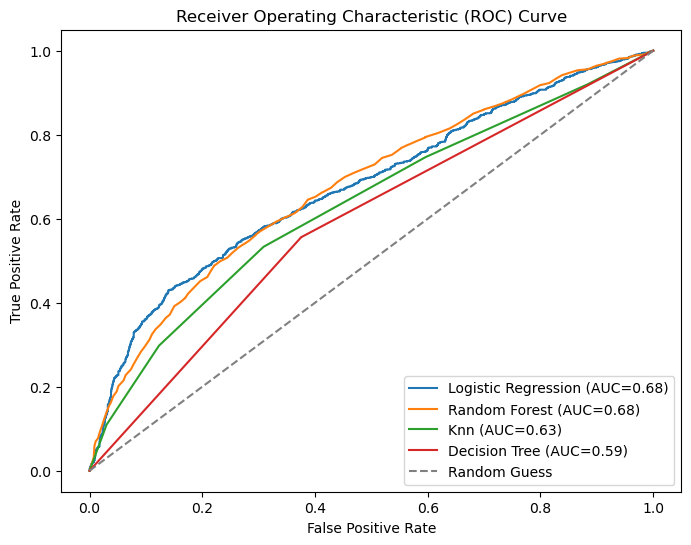

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {'Logistic Regression': lr, 'Random Forest': rf, 'Knn': kn, 'Decision Tree': dt}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    print('Threshold of', name, thresholds)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='{} (AUC={:.2f})'.format(name, roc_auc))

# add labels and legend to the plot
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# show the plot
plt.show()
